# Neural Network Test

In [1]:
from typing import Tuple, Dict

import numpy as np
import matplotlib.pyplot as plt

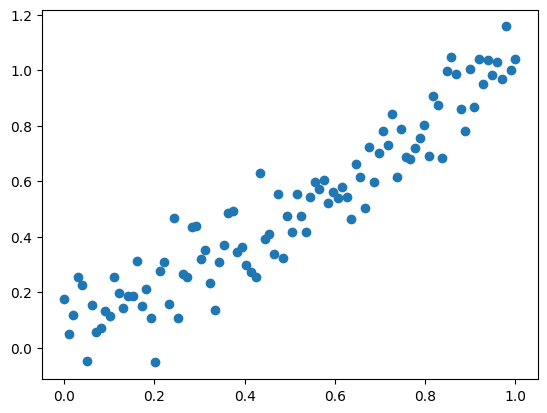

In [2]:
np.random.seed(0)

x = np.linspace(0, 1, 100)
y = x + np.random.normal(scale=0.1, size=x.shape)

plt.scatter(x, y)

## Algebraic Linear Regression

In [3]:
def mse(y: np.ndarray, y_hat: np.ndarray) -> float:
    MSE = np.mean((y - y_hat)**2)
    return MSE

MSE: 0.133


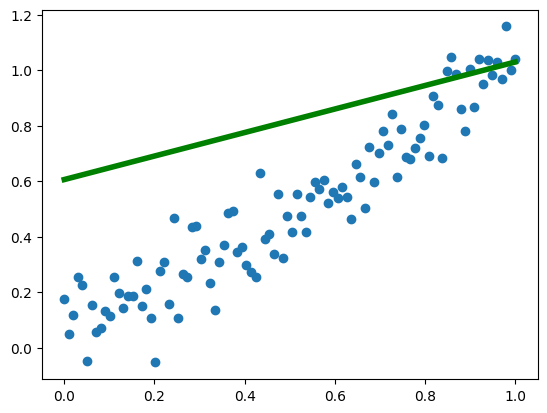

In [4]:
a = np.random.rand()
b = np.random.rand()
print(f"MSE: {mse(y, a * x + b):.3f}")

plt.scatter(x, y)
plt.plot(x, a * x + b, color="g", linewidth=4)

## Linear Regression with neural network

![interactive LR](http://cdn-images-1.medium.com/max/640/1*eeIvlwkMNG1wSmj3FR6M2g.gif)

In [5]:
def optimize(
    x: np.ndarray, y: np.ndarray, a: float, b: float, learning_rate: float = 0.1
):
    y_hat = a * x + b
    errors = y - y_hat
    # implement me!
    new_a = a + learning_rate * (-2) * np.mean(errors * -x)
    new_b = b + learning_rate * (-2) * np.mean(-errors)

    return new_a, new_b

In [6]:
for i in range(1000):
    loss = mse(y, a * x + b)
    a, b = optimize(x, y, a, b)
    if i % 100 == 0:
        print(f"step {i} loss: ", loss)

print("final loss:", loss)

step 0 loss:  0.1330225119404028
step 100 loss:  0.012673197778527677
step 200 loss:  0.010257153540857817
step 300 loss:  0.0100948037549359
step 400 loss:  0.010083894412889118
step 500 loss:  0.010083161342973332
step 600 loss:  0.010083112083219709
step 700 loss:  0.010083108773135261
step 800 loss:  0.010083108550709076
step 900 loss:  0.01008310853576281
final loss: 0.010083108534760455


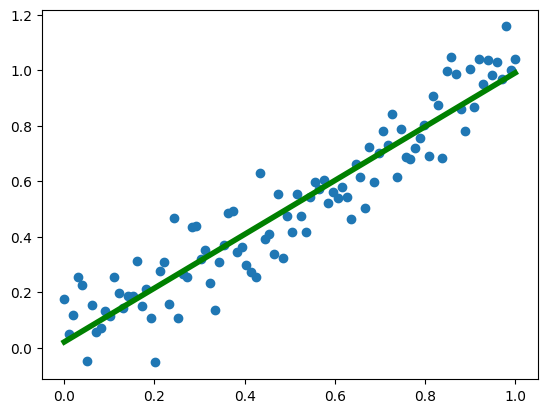

In [7]:
plt.scatter(x, y)
plt.plot(x, a * x + b, color="g", linewidth=4)

In [8]:
import sys
sys.path.append('../network') 
from network import Network

In [9]:
x_b= np.column_stack((x, np.ones_like(x)))

In [10]:
model = Network()
model.add_layer(2, 1, activation_function='identity')

model.fit(x_b, y, learning_rate=0.1, epochs=1000, verbose=2, batch_size=32)


Epoch 0: loss = 0.324107830018682
Epoch 100: loss = 0.010852469531206539
Epoch 200: loss = 0.010528877574303897
Epoch 300: loss = 0.010633340476060082
Epoch 400: loss = 0.010457785667838454
Epoch 500: loss = 0.011485453860864912
Epoch 600: loss = 0.01131191361758093
Epoch 700: loss = 0.010868524454013255
Epoch 800: loss = 0.012029696522745086
Epoch 900: loss = 0.010949388412071381


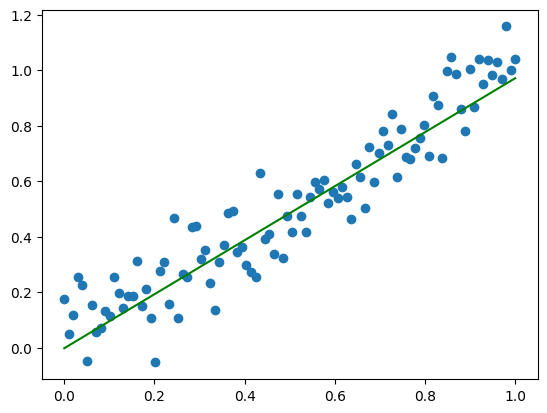

In [11]:
plt.scatter(x, y)
plt.plot(x, model.predict(x_b), color = 'green')

## Dataset initialisation

I use the dataset [Adult Census](https://archive.ics.uci.edu/ml/datasets/adult). It is used to predict if somebody earns more or less than 50k dolars, based on demografic data.

In [12]:
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

In [13]:
import pandas as pd

columns = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "wage"
]

"""
age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
"""

df = pd.read_csv("adult.data", header=None, names=columns)
df.wage.unique()

array([' <=50K', ' >50K'], dtype=object)

In [14]:
# attribution: https://www.kaggle.com/code/royshih23/topic7-classification-in-python
df['education'].replace('Preschool', 'dropout',inplace=True)
df['education'].replace('10th', 'dropout',inplace=True)
df['education'].replace('11th', 'dropout',inplace=True)
df['education'].replace('12th', 'dropout',inplace=True)
df['education'].replace('1st-4th', 'dropout',inplace=True)
df['education'].replace('5th-6th', 'dropout',inplace=True)
df['education'].replace('7th-8th', 'dropout',inplace=True)
df['education'].replace('9th', 'dropout',inplace=True)
df['education'].replace('HS-Grad', 'HighGrad',inplace=True)
df['education'].replace('HS-grad', 'HighGrad',inplace=True)
df['education'].replace('Some-college', 'CommunityCollege',inplace=True)
df['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
df['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
df['education'].replace('Bachelors', 'Bachelors',inplace=True)
df['education'].replace('Masters', 'Masters',inplace=True)
df['education'].replace('Prof-school', 'Masters',inplace=True)
df['education'].replace('Doctorate', 'Doctorate',inplace=True)

df['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
df['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
df['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
df['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
df['marital-status'].replace(['Separated'], 'Separated',inplace=True)
df['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
df['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

X = df.copy()
y = (X.pop("wage") == ' >50K').astype(int).values

train_valid_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=train_valid_size, 
    random_state=0, 
    shuffle=True, 
    stratify=y
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, 
    test_size=train_valid_size, 
    random_state=0, 
    shuffle=True, 
    stratify=y_train
)

continuous_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
continuous_X_train = X_train[continuous_cols]
categorical_X_train = X_train.loc[:, ~X_train.columns.isin(continuous_cols)]

continuous_X_valid = X_valid[continuous_cols]
categorical_X_valid = X_valid.loc[:, ~X_valid.columns.isin(continuous_cols)]

continuous_X_test = X_test[continuous_cols]
categorical_X_test = X_test.loc[:, ~X_test.columns.isin(continuous_cols)]

categorical_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
continuous_scaler = StandardScaler() #MinMaxScaler(feature_range=(-1, 1))

categorical_encoder.fit(categorical_X_train)
continuous_scaler.fit(continuous_X_train)

continuous_X_train = continuous_scaler.transform(continuous_X_train)
continuous_X_valid = continuous_scaler.transform(continuous_X_valid)
continuous_X_test = continuous_scaler.transform(continuous_X_test)

categorical_X_train = categorical_encoder.transform(categorical_X_train)
categorical_X_valid = categorical_encoder.transform(categorical_X_valid)
categorical_X_test = categorical_encoder.transform(categorical_X_test)

X_train = np.concatenate([continuous_X_train, categorical_X_train], axis=1)
X_valid = np.concatenate([continuous_X_valid, categorical_X_valid], axis=1)
X_test = np.concatenate([continuous_X_test, categorical_X_test], axis=1)

X_train.shape, y_train.shape

C:\Users\andrz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((20838, 108), (20838,))

### Class percenteges

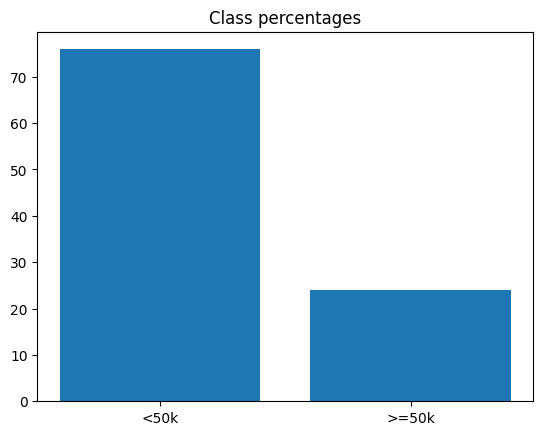

In [16]:
import matplotlib.pyplot as plt

y_pos_perc = 100 * y_train.sum().item() / len(y_train)
y_neg_perc = 100 - y_pos_perc

plt.title("Class percentages")
plt.bar(["<50k", ">=50k"], [y_neg_perc, y_pos_perc])
plt.show()

## Logistic Regression

In [17]:
learning_rate = 1e-3

input_size = X_train.shape[1]


model = Network()
model.add_layer(in_features=input_size, out_features=1, activation_function='logistic')

model.fit(X_train, y_train, epochs=3000, verbose=2, learning_rate=learning_rate, batch_size=64)

Epoch 0: loss = 0.2993162098680571
Epoch 100: loss = 0.23970197873201968
Epoch 200: loss = 0.21028180077306777
Epoch 300: loss = 0.19432931423296845
Epoch 400: loss = 0.18308218157637843
Epoch 500: loss = 0.1738755090756084
Epoch 600: loss = 0.16658062141154661
Epoch 700: loss = 0.16064272015392878
Epoch 800: loss = 0.15548353599740647
Epoch 900: loss = 0.15106746524849052
Epoch 1000: loss = 0.14745574270688874
Epoch 1100: loss = 0.14448332053883042
Epoch 1200: loss = 0.1418650760196207
Epoch 1300: loss = 0.1394414299022001
Epoch 1400: loss = 0.1376316586270546
Epoch 1500: loss = 0.13590978593402517
Epoch 1600: loss = 0.13444702281670592
Epoch 1700: loss = 0.1332497445660252
Epoch 1800: loss = 0.13210289818306648
Epoch 1900: loss = 0.1310228916338675
Epoch 2000: loss = 0.1300438073804009
Epoch 2100: loss = 0.12902698084498485
Epoch 2200: loss = 0.12821223398240814
Epoch 2300: loss = 0.127385433637971
Epoch 2400: loss = 0.12659991433593923
Epoch 2500: loss = 0.1258025049434674
Epoch 260

In [18]:
from sklearn.metrics import precision_recall_curve, precision_recall_fscore_support, roc_auc_score

y_score = model.predict(X_test)

auroc = roc_auc_score(y_test, y_score)
print(f"AUROC: {100 * auroc:.2f}%")

AUROC: 85.29%


### Helpful functions to evaluate model

In [19]:
from sklearn.metrics import PrecisionRecallDisplay


def get_optimal_threshold(
    precisions: np.array, 
    recalls: np.array, 
    thresholds: np.array
) -> Tuple[int, float]:
    f1_scores = 2 * precisions * recalls / (precisions + recalls)
    
    optimal_idx = np.nanargmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]
    
    return optimal_idx, optimal_threshold


def plot_precision_recall_curve(y_true, y_pred_score) -> None:
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_pred_score)
    optimal_idx, optimal_threshold = get_optimal_threshold(precisions, recalls, thresholds)

    disp = PrecisionRecallDisplay(precisions, recalls)
    disp.plot()
    plt.title(f"Precision-recall curve (opt. thresh.: {optimal_threshold:.4f})")
    plt.axvline(recalls[optimal_idx], color="green", linestyle="-.")
    plt.axhline(precisions[optimal_idx], color="green", linestyle="-.")
    plt.show()


In [20]:
import activation_function_base as act

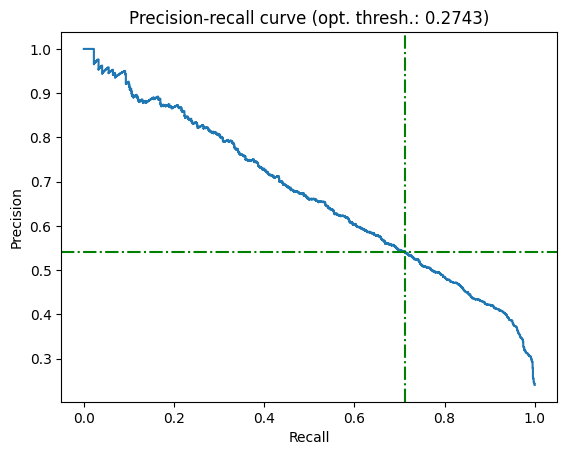

In [21]:
y_pred_valid_score = model.predict(X_valid)

plot_precision_recall_curve(y_valid, y_pred_valid_score)

## Multilayer network

In [22]:
input_size = X_train.shape[1]

model = Network()
model.add_layer(input_size, 256, activation_function='relu')
model.add_layer(256, 128, activation_function='relu')
model.add_layer(128, 1, activation_function='logistic')

In [23]:
learning_rate = 1e-3

model.fit(X=X_train, y=y_train, learning_rate=learning_rate, epochs=2000, verbose=2, batch_size=128)

Epoch 0: loss = 0.4327669525664546
Epoch 100: loss = 0.21542013267990923
Epoch 200: loss = 0.18951253507412993
Epoch 300: loss = 0.1762843212371834
Epoch 400: loss = 0.17493050840790472
Epoch 500: loss = 0.16641040993678735
Epoch 600: loss = 0.16299689059918088
Epoch 700: loss = 0.165294569833124
Epoch 800: loss = 0.16140016550532288
Epoch 900: loss = 0.15885825053297423
Epoch 1000: loss = 0.15627386881126865
Epoch 1100: loss = 0.15524786792367065
Epoch 1200: loss = 0.1556960748699237
Epoch 1300: loss = 0.1533511036928052
Epoch 1400: loss = 0.15050132099602467
Epoch 1500: loss = 0.14824263776080818
Epoch 1600: loss = 0.1480704708491109
Epoch 1700: loss = 0.1516212503505855
Epoch 1800: loss = 0.14635860392903483
Epoch 1900: loss = 0.14555091151242905


AUROC: 87.40%


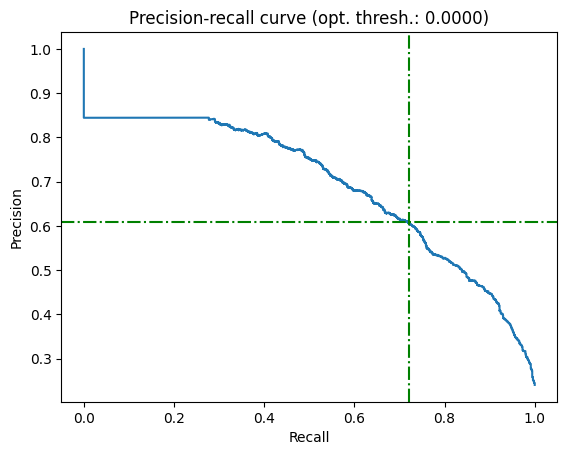

In [24]:
y_pred_valid_score = model.predict(X_valid)
y_pred_test_score = model.predict(X_test)

auroc = roc_auc_score(y_test, y_pred_test_score)
print(f"AUROC: {100 * auroc:.2f}%")


plot_precision_recall_curve(y_valid, y_pred_valid_score)

## Function to evaluate the model

In [25]:
from typing import Optional

from sklearn.metrics import precision_score, recall_score, f1_score
from torch import sigmoid

def evaluate_model(
    model: Network, 
    X: np.ndarray, 
    y: np.ndarray, 
    threshold: Optional[float]= None
) -> Dict[str, float]:
    
    
    y_pred = model.predict(X)
    loss = model.loss_fn(y_pred=y_pred, y_true=y)
        

    auroc = roc_auc_score(y_true=y, y_score=y_pred)

    if threshold is None:
        precisions, recalls, thresholds = precision_recall_curve(y, y_pred)
        _, threshold = get_optimal_threshold(precisions=precisions, recalls=recalls, thresholds=thresholds)
    
    y_pred = (y_pred > threshold).astype(float)

    loss = model.loss_fn(y_pred=y_pred, y_true=y)
    
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    
    
    results = {
        "loss": loss,
        "AUROC": auroc,
        "optimal_threshold": threshold,
        "precision": precision,
        "recall": recall,
        "F1-score": f1,
    }
    return results


In [26]:
evaluate_model(model=model, X=X_test, y=y_test)

{'loss': 0.17580224167050515,
 'AUROC': 0.8740115118342585,
 'optimal_threshold': 6.762783663515283e-12,
 'precision': 0.6178272980501393,
 'recall': 0.7072704081632653,
 'F1-score': 0.6595301813856674}

## Dropout and early stopping

In [27]:
from copy import deepcopy

from torch.utils.data import DataLoader


learning_rate = 1e-3
dropout_p = 0.3
l2_reg = 1e-4
batch_size = 128
max_epochs = 1000

early_stopping_patience = 8

input_size = X_train.shape[1]


In [28]:
model = Network()

model.add_layer(input_size, 256, activation_function='relu', dropout_prob=dropout_p)
model.add_layer(256, 128, activation_function='relu', dropout_prob=dropout_p)
model.add_layer(128, 1, activation_function='logistic')

model.early_stopping(early_stopping_patience=early_stopping_patience)

In [29]:
model.fit(X=X_train, y=y_train, learning_rate=learning_rate, epochs=max_epochs, verbose=2, batch_size=batch_size)

Epoch 0: loss = 0.6780166776790882
Epoch 100: loss = 0.24009742720191887


In [30]:
test_metrics = evaluate_model(model, X_test, y_test)

print(f"AUROC: {100 * test_metrics['AUROC']:.2f}%")
print(f"F1: {100 * test_metrics['F1-score']:.2f}%")
print(f"Precision: {100 * test_metrics['precision']:.2f}%")
print(f"Recall: {100 * test_metrics['recall']:.2f}%")

AUROC: 69.23%
F1: 48.17%
Precision: 35.70%
Recall: 74.04%


C:\Users\andrz\AppData\Local\Temp\ipykernel_2080\2237191592.py:9: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * precisions * recalls / (precisions + recalls)


## Batch normalisation

In [35]:
learning_rate = 1e-3
dropout_p = None

batch_size = 128
max_epochs = 400

early_stopping_patience = 8

In [41]:
model = Network()

model.add_layer(input_size, 256, activation_function='relu', dropout_prob=dropout_p, batch_norm_1d_size=256)
model.add_layer(256, 128, activation_function='relu', dropout_prob=dropout_p, batch_norm_1d_size=128)
model.add_layer(128, 1, activation_function='logistic')

model.early_stopping(early_stopping_patience=early_stopping_patience)


In [42]:
model.fit(X=X_train, y=y_train, learning_rate=learning_rate, epochs=max_epochs, verbose=1, batch_size=batch_size)

Epoch 0: loss = 0.39307285796938823
Epoch 10: loss = 0.2049959076257575
Epoch 20: loss = 0.18577219724432809
Epoch 30: loss = 0.1776084692298224
Epoch 40: loss = 0.17073775967475485
Epoch 50: loss = 0.16784144174852336
Epoch 60: loss = 0.16592084439184215
Epoch 70: loss = 0.1665649736973589
Epoch 80: loss = 0.16002088689037994
Epoch 90: loss = 0.15901284216629588
Epoch 100: loss = 0.15786780910159684
Epoch 110: loss = 0.15821791332118415


In [43]:
test_metrics = evaluate_model(model, X_test, y_test)

print(f"AUROC: {100 * test_metrics['AUROC']:.2f}%")
print(f"F1: {100 * test_metrics['F1-score']:.2f}%")
print(f"Precision: {100 * test_metrics['precision']:.2f}%")
print(f"Recall: {100 * test_metrics['recall']:.2f}%")

AUROC: 87.17%
F1: 64.75%
Precision: 58.87%
Recall: 71.94%
